# 12章　k近傍法

- k近傍法（k-nearest neighbor: k-NN）
- 学習データをベクトル空間にプロットし、未知のデータが得られたらそこから距離が近い順に任意のk個を取得し、データが属するクラスを推定する
- k平均法（k-means）名前が似ている機械学習のアルゴリズムだが、k近傍法は教師有り学習の分類問題で、k-meansは教師なし学習のクラスタリング

[この記事の図がわかりやすいかも https://qiita.com/yshi12/items/26771139672d40a0be32](https://qiita.com/yshi12/items/26771139672d40a0be32)

## 12.1 モデル

- 既存の予測モデルの中ではもっとも簡単なモデルの１つ
- 数学的前提や強力な計算力は必要とせず、距離の概念、近くにあるデータは類似しているという前提だけが必要
- 着目している現象の原因を理解する助けにはならない（隣人たちの投票行動から別の誰かの投票行動の予測はできてもなぜそう仕方理由まではわからない）

ここでは**「kの値を3または5を選んで、新しいデータの分類として、k個（3または5個）の近傍データのラベルから多数決で新しいデータの分類を決定する」関数**を作る

In [33]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

# Counter.most_commonは出現数順に要素を取得(この例では引数1なので１個取得)
# 関数の引数のリストに対し、もっとも多い分類を返すような処理をおこなっている
assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

In [28]:
# 最大に出現する要素が同点であった場合１つに決まるまでkの値をすくなくすると

def majority_vote(labels: List[str]) -> str:
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        # 同点な場合リストより１要素はずして再帰的に関数を呼び出す
        return majority_vote(labels[:-1])
    
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

In [29]:
from typing import NamedTuple
from scratch.linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
    point: Vector
    label: str
    
def knn_classify(k: int, 
                labeled_points: List[LabeledPoint],
                new_point: Vector) -> str:
    # labeled_pooinstsを距離でソート
    by_distance = sorted(labeled_points, key=lambda lp: distance(lp.point, new_point))
    
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # 多数決関数で多数決を行う
    return majority_vote(k_nearest_labels)
            

## 12.2 事例：Irisデータセット

機械学習定番のアイリスデータセットをダウンロードし、４つの測定値からクラス（ここでは品種）を予測するモデルを構築する

In [13]:
import requests

data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# ダウンロードしたirisデータを'iris.data'ファイルに保存
with open('iris.data', 'w') as f:
    f.write(data.text)

In [34]:
# ４つの測定値からクラス（つまり品種）を予測するモデル

from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str])  -> LabeledPoint:
    measurements = [float(value) for value in row[:-1]]
    label = row[-1].split("-")[-1]
    return LabeledPoint(measurements, label)


# iris.dataの最後に空の行が入るかもしれない。
#この場合parse_iris_row()にindex errorが発生するのであらかじめ空行を削除しておく

with open('iris.data') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader]
    
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)


defaultdict(list,
            {'setosa': [[5.1, 3.5, 1.4, 0.2],
              [4.9, 3.0, 1.4, 0.2],
              [4.7, 3.2, 1.3, 0.2],
              [4.6, 3.1, 1.5, 0.2],
              [5.0, 3.6, 1.4, 0.2],
              [5.4, 3.9, 1.7, 0.4],
              [4.6, 3.4, 1.4, 0.3],
              [5.0, 3.4, 1.5, 0.2],
              [4.4, 2.9, 1.4, 0.2],
              [4.9, 3.1, 1.5, 0.1],
              [5.4, 3.7, 1.5, 0.2],
              [4.8, 3.4, 1.6, 0.2],
              [4.8, 3.0, 1.4, 0.1],
              [4.3, 3.0, 1.1, 0.1],
              [5.8, 4.0, 1.2, 0.2],
              [5.7, 4.4, 1.5, 0.4],
              [5.4, 3.9, 1.3, 0.4],
              [5.1, 3.5, 1.4, 0.3],
              [5.7, 3.8, 1.7, 0.3],
              [5.1, 3.8, 1.5, 0.3],
              [5.4, 3.4, 1.7, 0.2],
              [5.1, 3.7, 1.5, 0.4],
              [4.6, 3.6, 1.0, 0.2],
              [5.1, 3.3, 1.7, 0.5],
              [4.8, 3.4, 1.9, 0.2],
              [5.0, 3.0, 1.6, 0.2],
              [5.0, 3.4, 1.6, 0.4],


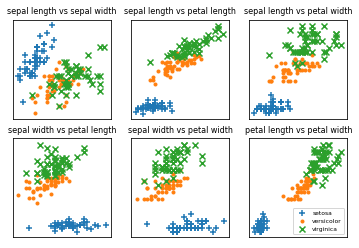

In [23]:
from matplotlib import pyplot as plt
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x']

fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)
            
ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()

# petal lenght とpetal widthを考慮に入れると最近傍にもとづいてクラスタリングできそう

In [25]:
import random
from scratch.machine_learning import split_data

# iris_dataを教師データとテストデータに分割する
random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)
assert len(iris_train) == 0.7 * 150
assert len(iris_test) == 0.3 * 150

In [35]:
from typing import Tuple

confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

for iris in iris_test:
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual:
        num_correct += 1
    
    confusion_matrix[(predicted, actual)] += 1

pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)

# iris_testでは0.977777..の正解率
# ただし('virginica', 'versicolor'): 1の不正解が一件だけでる

0.9777777777777777 defaultdict(<class 'int'>, {('setosa', 'setosa'): 13, ('versicolor', 'versicolor'): 15, ('virginica', 'virginica'): 16, ('virginica', 'versicolor'): 1})


## 12.3 次元の呪い

- 「高次元空間では点と点の距離は近接しない」という傾向があるらしい
- 高次元化に伴い、点の周辺に他の点が存在しない空間が広がり始める。次元を増やすなら指数関数的にデータを増やさないとデータポイントの周りに何もない空間が生じる
- そのため、高次元データの近傍法を適用する場合、最初に次元削除を行うのが良いあいであであるとのこと
- ちなみに、、一般的にはユークリッド距離では、距離が重要なファクターとなるK-NNでは結果の信頼性が怪しいらしい

